In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [3]:
def computeOrder(df, 
                 optimal=True,
                 dist_method="euclidean", 
                 cluster_method="average"):
    
    dist_mat = pdist(df, metric=dist_method)
    link_mat = hierarchy.linkage(dist_mat, method=cluster_method)

    if optimal==True:
        return hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(link_mat, dist_mat))
    else:
        return hierarchy.leaves_list(link_mat)

def clustermap(df, 
               dist_method="euclidean", 
               cluster_method="average", 
               col_cluster=True, 
               row_cluster=True,
               optimal=True,
               **heatmap_kws):
    
    if row_cluster==True:
        row_order = computeOrder(df, optimal, dist_method, cluster_method)
        row_order = [df.index[i] for i in row_order]
    else:
        col_order = df.index
    
    if col_cluster==True:
        col_order = computeOrder(df.transpose(), optimal, dist_method, cluster_method)
        col_order = [df.columns[i] for i in col_order]
    else:
        row_order = df.columns
    
    df = df.reindex(col_order, axis=1).reindex(row_order, axis=0)
    
    ax = sns.heatmap(df, **heatmap_kws)
    
    return ax, df

In [4]:
df = pd.read_csv('../cptac/brca-prospective/data/raw_data/phospho_df.tsv', sep='\t')

In [5]:
df['index'] = df['id'] + '-' + df['phosSite']
df = df.drop_duplicates('index', keep='first')

In [6]:
df = df.set_index('index')

In [7]:
samples = [x for x in df.columns if x.isupper() and '.' not in x]
df = df[samples].dropna(how='any', axis=0)

In [8]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap.set_bad('#BDBDBD')
cmap.set_over('#9E031A')
cmap.set_under('#0C4A60')


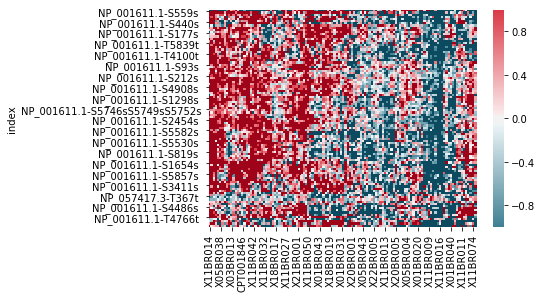

In [9]:
kwargs = dict(vmin=-1, vmax=1, cmap=cmap)
ax, temp = clustermap(df.iloc[0:100, :], **kwargs)

In [ ]:
temp